# Practical 12: Logistic Regression for Classification Using Scikit-Learn

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer

In [2]:
# a. Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame with the feature data
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution:\n{y.value_counts()}")
print("\nTarget names:")
for i, name in enumerate(data.target_names):
    print(f"Class {i}: {name}")

# Display the first 5 rows of the feature data
X.head()

Dataset shape: (569, 30)
Number of classes: 2
Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Target names:
Class 0: malignant
Class 1: benign


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


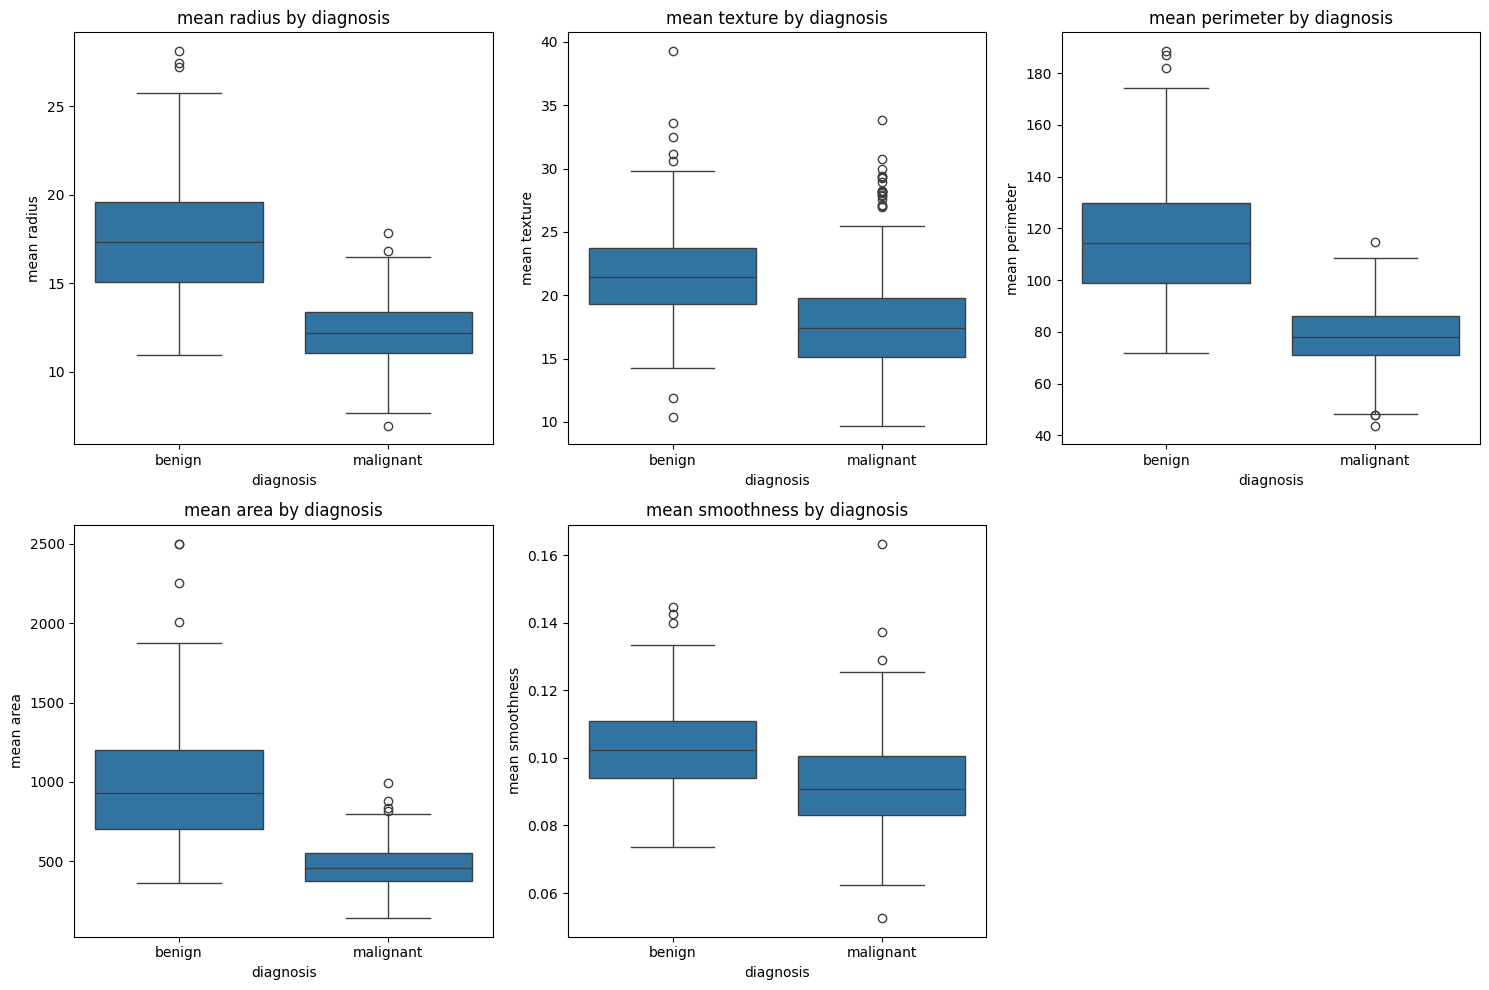

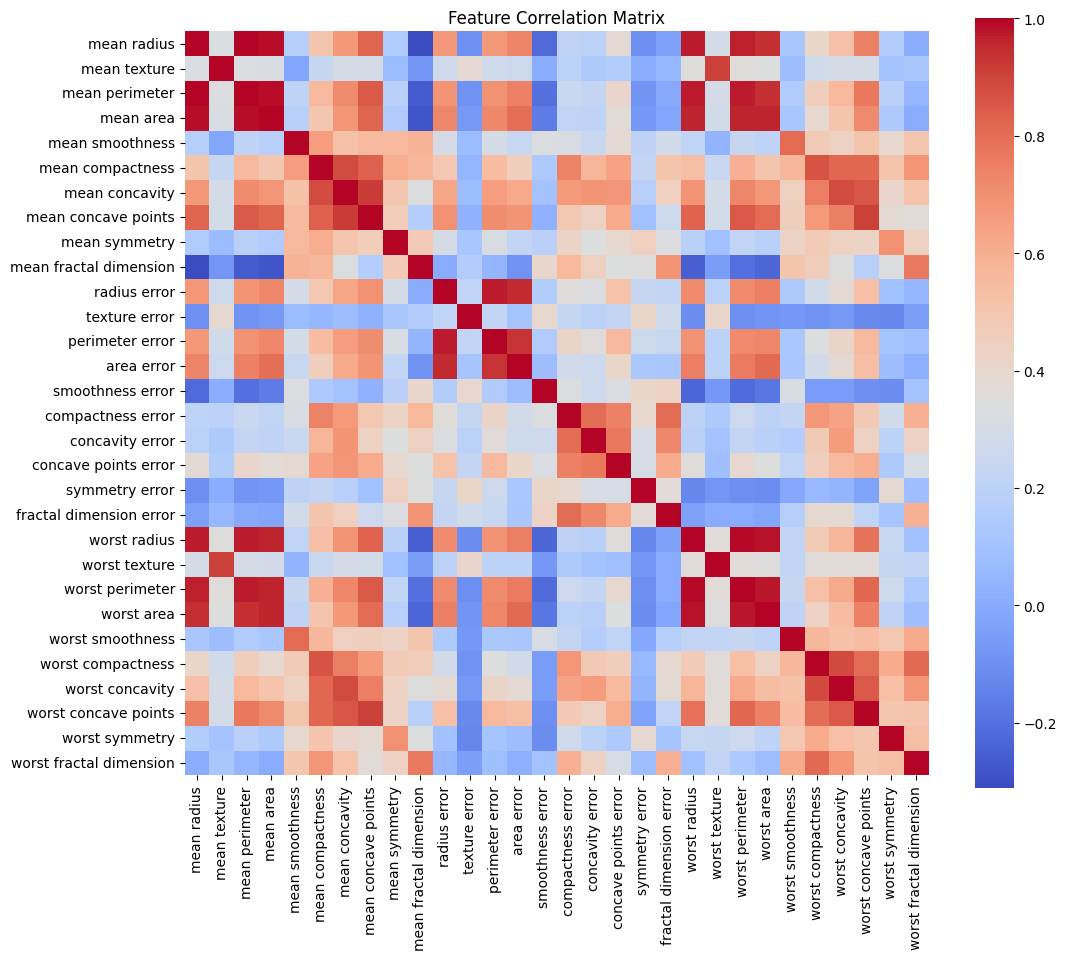

In [3]:
# b. Exploratory data analysis
# Let's examine the feature distributions by class

# Create a DataFrame with both features and target
df = X.copy()
df['diagnosis'] = y.map({0: 'benign', 1: 'malignant'})

# Select a few important features to visualize
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Create box plots to compare feature distributions by class
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by diagnosis')
plt.tight_layout()
plt.show()

# Create a correlation heatmap for the features
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [4]:
# c. Prepare the data for modeling

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Show the first few rows of scaled data
print("\nScaled features (first 5 rows):")
X_train_scaled_df.head()

Training set size: 398 samples
Test set size: 171 samples

Scaled features (first 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613


Model Coefficients (Top 10 positive and negative):

Top 10 positive coefficients (features most associated with malignant):
                    Feature  Coefficient
19  fractal dimension error     0.694861
5          mean compactness     0.622023
15        compactness error     0.600753
18           symmetry error     0.505452
8             mean symmetry     0.221625
11            texture error     0.154407
9    mean fractal dimension     0.139476
25        worst compactness     0.118408
16          concavity error    -0.083213
29  worst fractal dimension    -0.103243

Top 10 negative coefficients (features most associated with benign):
                 Feature  Coefficient
6         mean concavity    -0.747674
23            worst area    -0.774047
27  worst concave points    -0.808050
20          worst radius    -0.814530
13            area error    -0.868623
26       worst concavity    -0.974874
7    mean concave points    -1.103646
28        worst symmetry    -1.202497
10          r

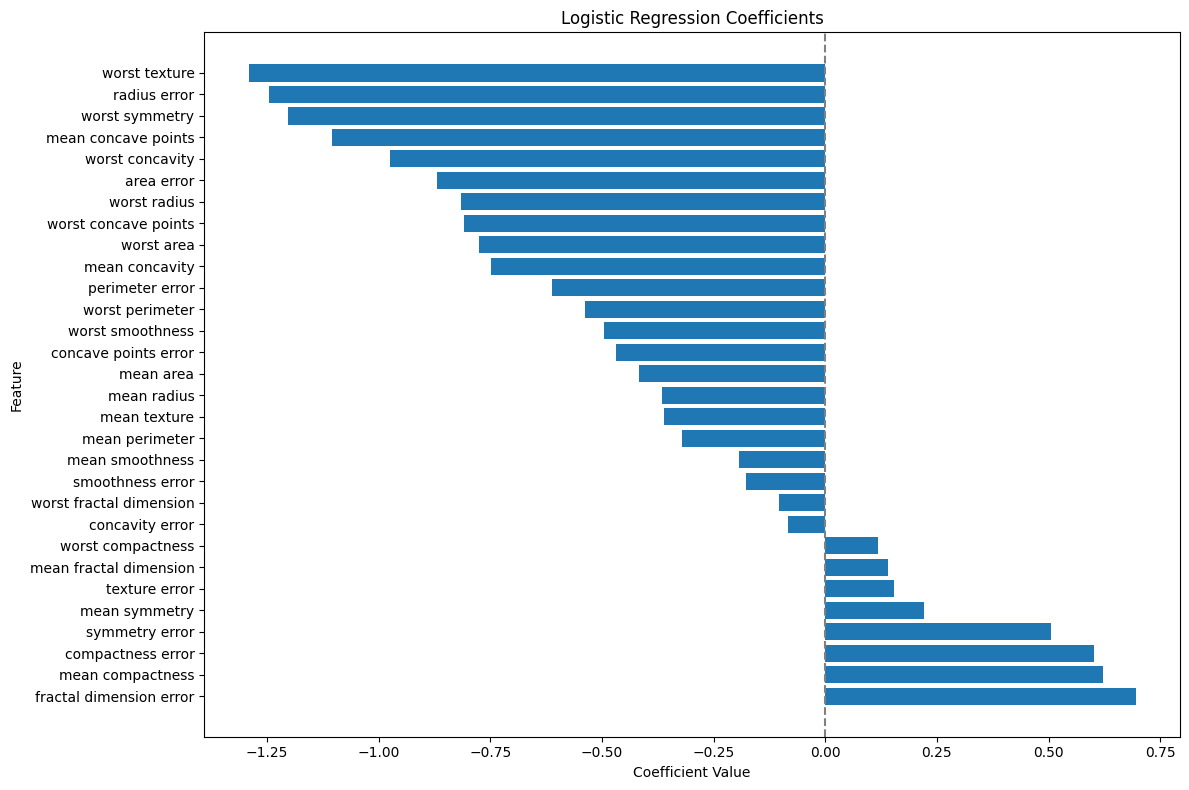

In [5]:
# d. Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Get the feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Model Coefficients (Top 10 positive and negative):")
print("\nTop 10 positive coefficients (features most associated with malignant):")
print(coefficients.head(10))
print("\nTop 10 negative coefficients (features most associated with benign):")
print(coefficients.tail(10))

# Plot the coefficients
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



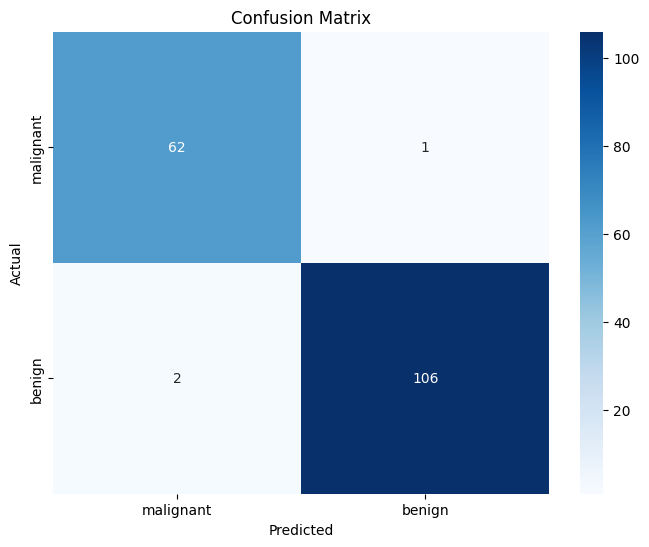

In [6]:
# e. Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

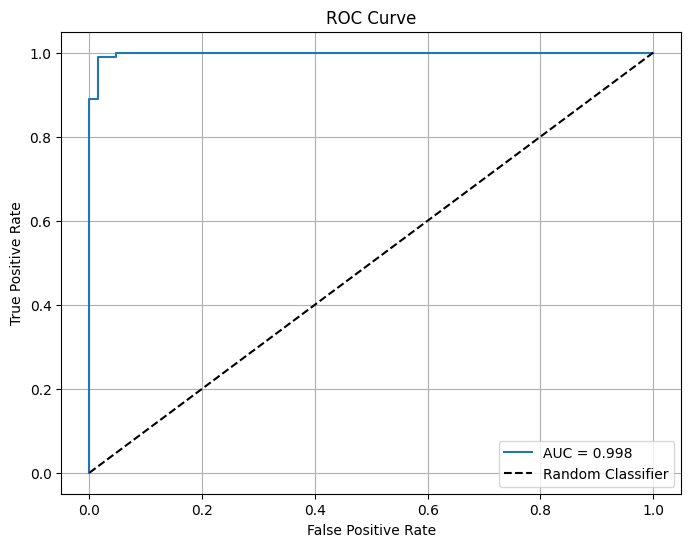

In [7]:
# f. Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

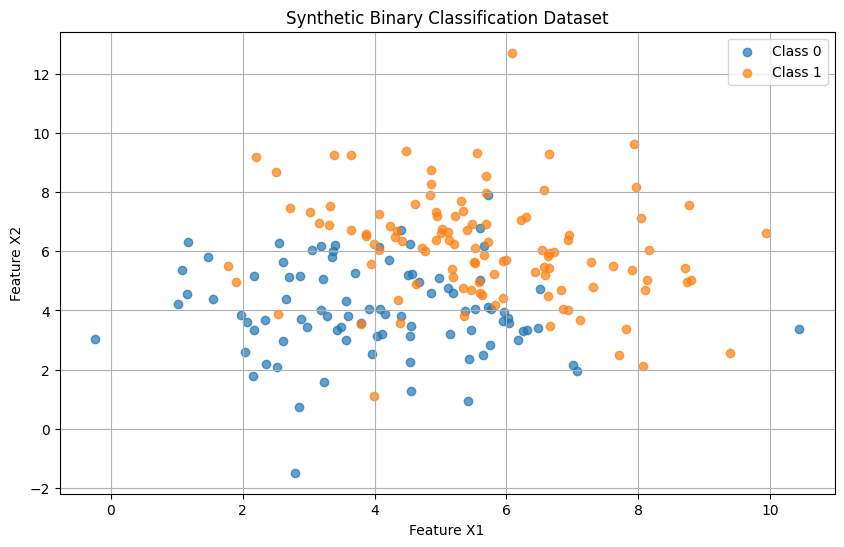

Class distribution:
target
1    110
0     90
Name: count, dtype: int64


In [8]:
# a. Create a synthetic dataset
np.random.seed(42)

# Generate two features
n_samples = 200
X1 = np.random.normal(loc=5, scale=2, size=n_samples)
X2 = np.random.normal(loc=5, scale=2, size=n_samples)

# Create a decision rule for binary classification
y_true = (X1 + X2 > 10).astype(int)

# Add some noise to make it more realistic
noise_indices = np.random.choice(n_samples, size=int(n_samples * 0.1), replace=False)
y_true[noise_indices] = 1 - y_true[noise_indices]

# Create a DataFrame for better handling
synthetic_df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'target': y_true
})

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(synthetic_df[synthetic_df['target'] == 0]['X1'], 
            synthetic_df[synthetic_df['target'] == 0]['X2'], 
            label='Class 0', alpha=0.7)
plt.scatter(synthetic_df[synthetic_df['target'] == 1]['X1'], 
            synthetic_df[synthetic_df['target'] == 1]['X2'], 
            label='Class 1', alpha=0.7)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Synthetic Binary Classification Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Show the class distribution
print(f"Class distribution:\n{synthetic_df['target'].value_counts()}")

In [9]:
# b. Split the synthetic data
X_synthetic = synthetic_df[['X1', 'X2']]
y_synthetic = synthetic_df['target']

X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42
)

print(f"Training set size: {X_train_syn.shape[0]} samples")
print(f"Test set size: {X_test_syn.shape[0]} samples")

Training set size: 140 samples
Test set size: 60 samples


In [10]:
# c. Train a logistic regression model on the synthetic data
model_syn = LogisticRegression(random_state=42)
model_syn.fit(X_train_syn, y_train_syn)

# Print the model coefficients
print(f"Intercept: {model_syn.intercept_[0]:.4f}")
print(f"Coefficient for X1: {model_syn.coef_[0][0]:.4f}")
print(f"Coefficient for X2: {model_syn.coef_[0][1]:.4f}")
print(f"\nLogistic Regression Equation:")
print(f"log(p/(1-p)) = {model_syn.intercept_[0]:.4f} + {model_syn.coef_[0][0]:.4f} * X1 + {model_syn.coef_[0][1]:.4f} * X2")

Intercept: -7.3562
Coefficient for X1: 0.6232
Coefficient for X2: 0.8821

Logistic Regression Equation:
log(p/(1-p)) = -7.3562 + 0.6232 * X1 + 0.8821 * X2


Accuracy on test set: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.94      0.88      0.91        34

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



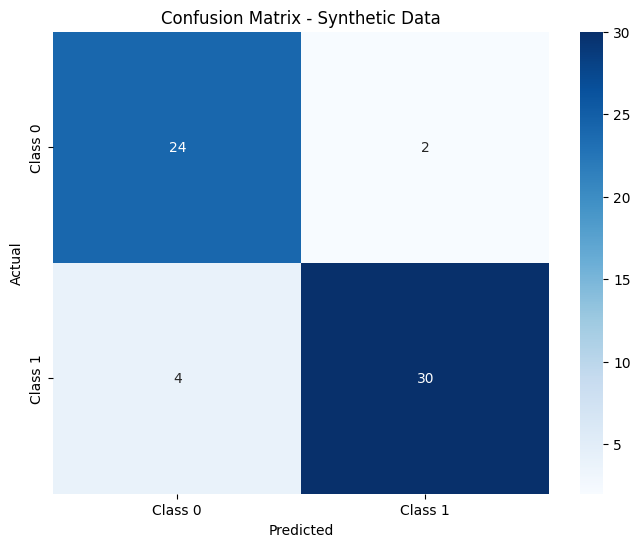

In [11]:
# d. Evaluate the model on the synthetic test set
y_pred_syn = model_syn.predict(X_test_syn)
accuracy_syn = accuracy_score(y_test_syn, y_pred_syn)
print(f"Accuracy on test set: {accuracy_syn:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_syn, y_pred_syn))

# Create a confusion matrix
cm_syn = confusion_matrix(y_test_syn, y_pred_syn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_syn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Synthetic Data')
plt.show()

c:\Users\admi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


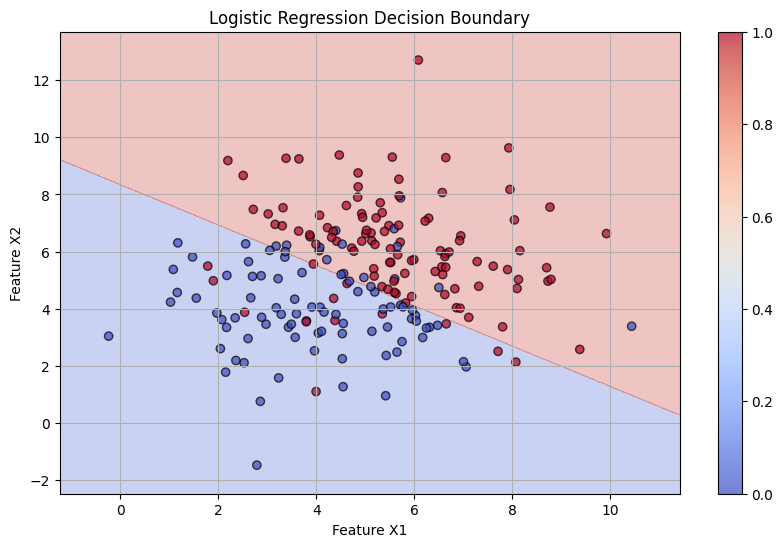

In [12]:
# e. Visualize the decision boundary
def plot_decision_boundary(X, y, model, title='Decision Boundary'):
    # Set up grid for visualization
    h = 0.02  # step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
    plt.xlabel('Feature X1')
    plt.ylabel('Feature X2')
    plt.title(title)
    plt.colorbar()
    plt.grid(True)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_synthetic, y_synthetic, model_syn, title='Logistic Regression Decision Boundary')